In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [3]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}

In [5]:
# renomear as colunas com as atribuições acima
gorjetas = dados.rename(columns=renomear)
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [6]:
# visualizar todas as possibilidades de dados dentro de uma coluna
gorjetas.sobremesa.unique()


array(['No', 'Yes'], dtype=object)

In [7]:
# Alterando o nome dos dados dentro da colunaa Sobremesa
sim_nao = {
    'No':'Não', 
    'Yes':'Sim'
}

In [8]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [9]:
# Alterando o nome dos dados da coluna dia_da_semana
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
dias = {
    'Sun': 'Domingo',
    'Sat': 'Sábado', 
    'Thur': 'Quinta', 
    'Fri': 'Sexta'
}

In [11]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [12]:
# Alterando o nome dos dados da coluna dia_da_semana
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [13]:
hora = {
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
}
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [14]:
# Importando a biblioteca Seaborn para visualização gráfica dos dados
import seaborn as sns

# Análise 1: Valor da conta e gorjeta

In [15]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

<AxesSubplot:xlabel='valor_da_conta', ylabel='gorjeta'>

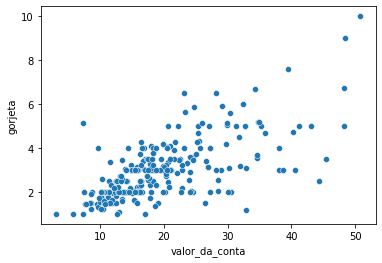

In [16]:
sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

In [17]:
# Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta

In [18]:
gorjetas.shape[0]

244

In [19]:
# Ver se há valores nulos
gorjetas.count()

valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

In [20]:
# Criando o campo porcentagem
gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['valor_da_conta']).round(2)
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


<AxesSubplot:xlabel='valor_da_conta', ylabel='porcentagem'>

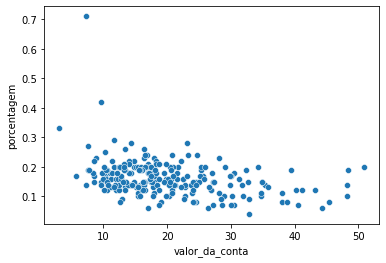

In [21]:
sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

In [22]:
# Percebe-se que o valor da contra nao é proporcional ao valor da gorjeta

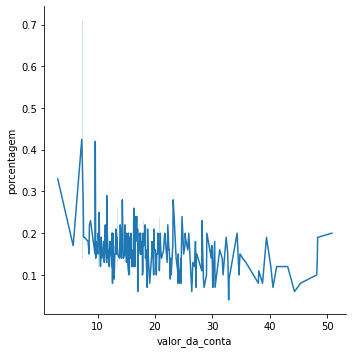

In [23]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

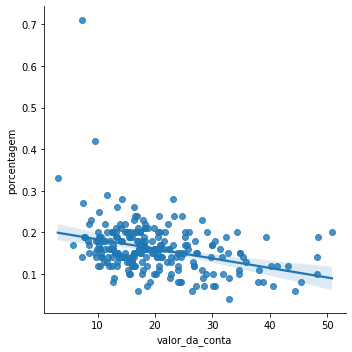

In [24]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Análise 2 - Sobremesa

In [25]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [26]:
gorjetas[gorjetas.sobremesa =='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [27]:
gorjetas[gorjetas.sobremesa =='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


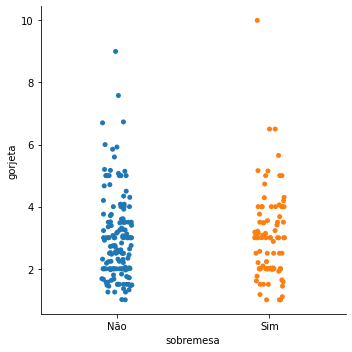

In [28]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

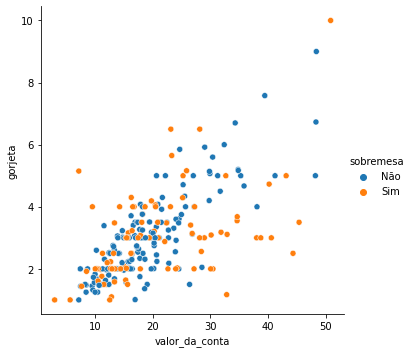

In [29]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

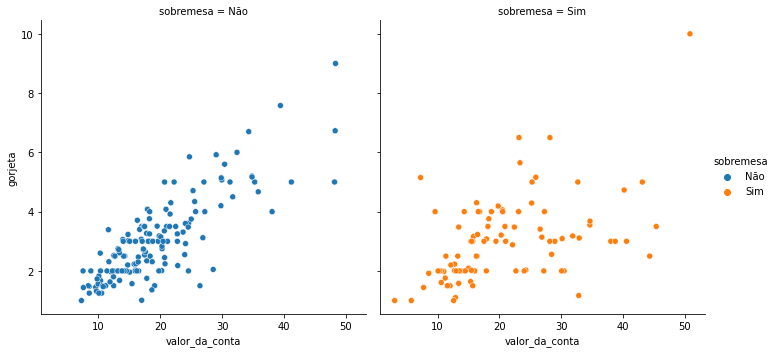

In [30]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

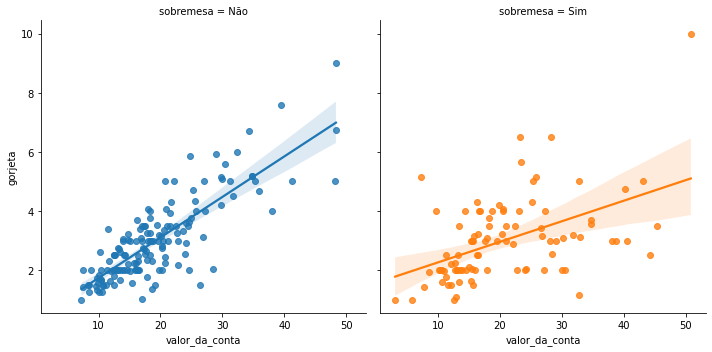

In [31]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

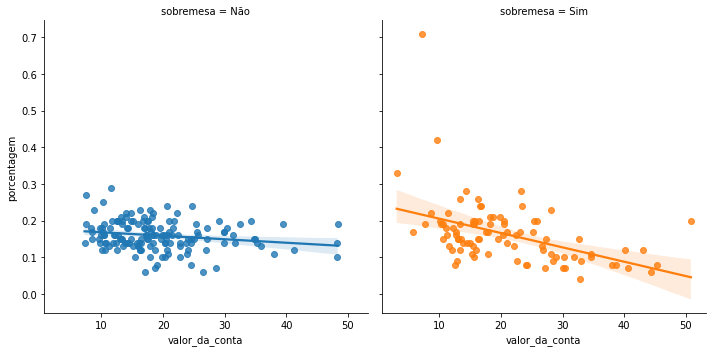

In [32]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

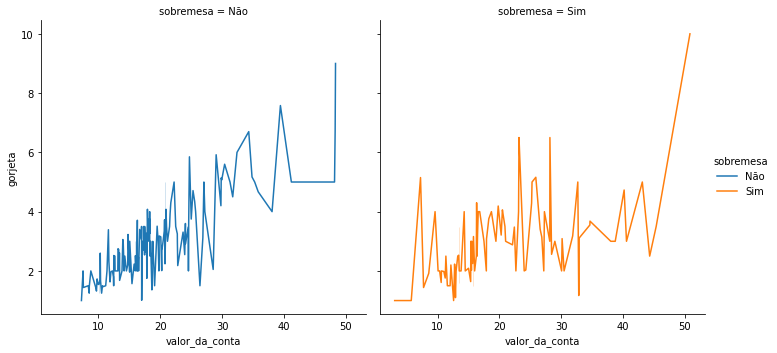

In [33]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', kind='line', col='sobremesa', data=gorjetas)

In [34]:
# Visualmente existe uma diferença no valor da gorjeta daqueles que pediram ou não sobremesa

# **Teste de hipótese**

H0 = A distribuição da taxa da gorjeta é a mesma nos dois grupos

H1 = a distribuição da taxa da gorjeta não é a mesma nos dois grupos

In [35]:
from scipy.stats import ranksums

In [36]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [37]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [38]:
r = ranksums(sobremesa, sem_sobremesa)

In [39]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.5266635660124415


A distribuição da taxa da gorjeta é a mesma nos dois grupos

# Analise 3: Dia da semana

In [40]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

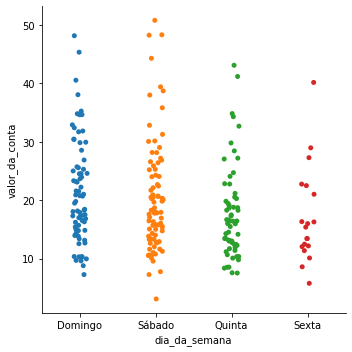

In [41]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

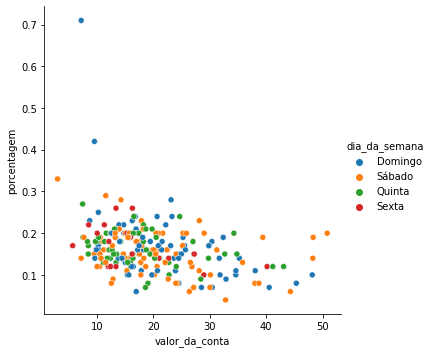

In [45]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

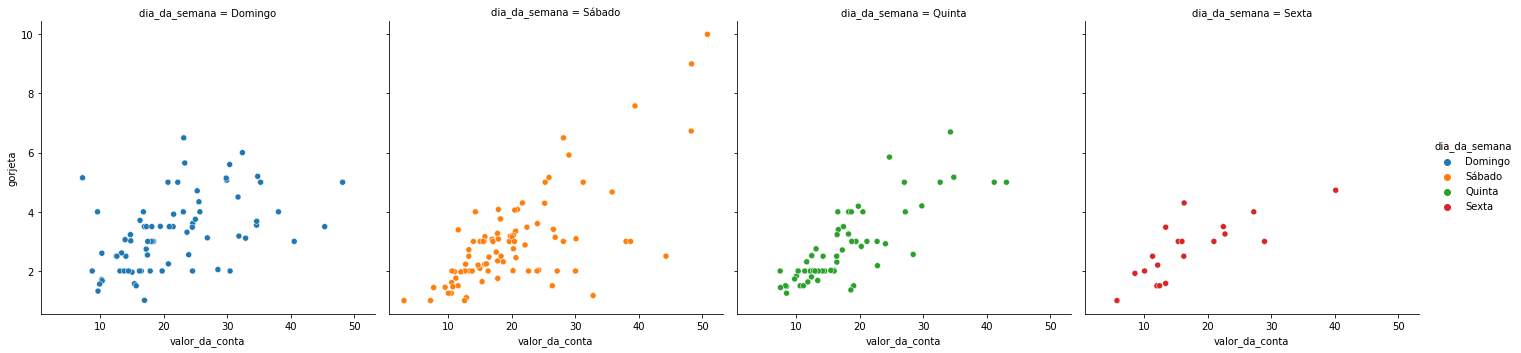

In [46]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

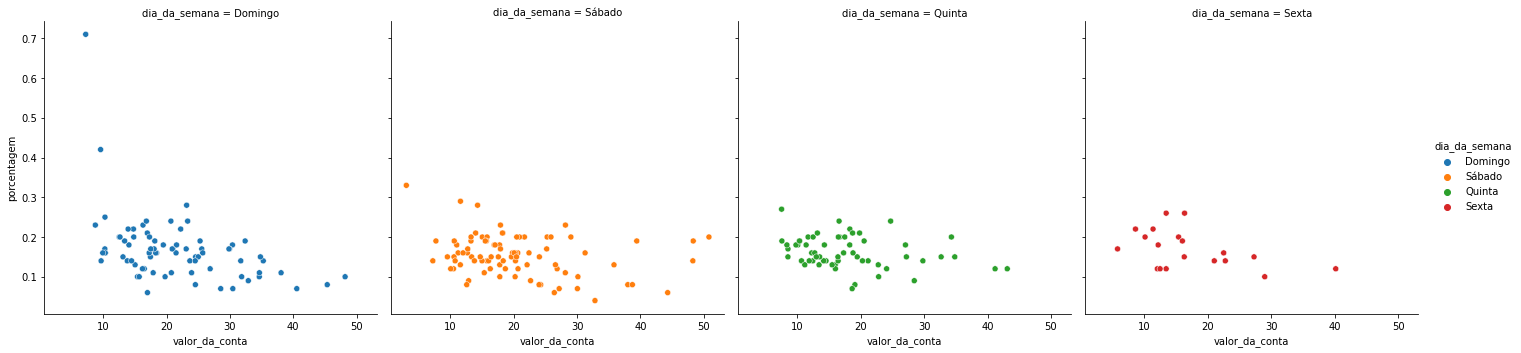

In [47]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

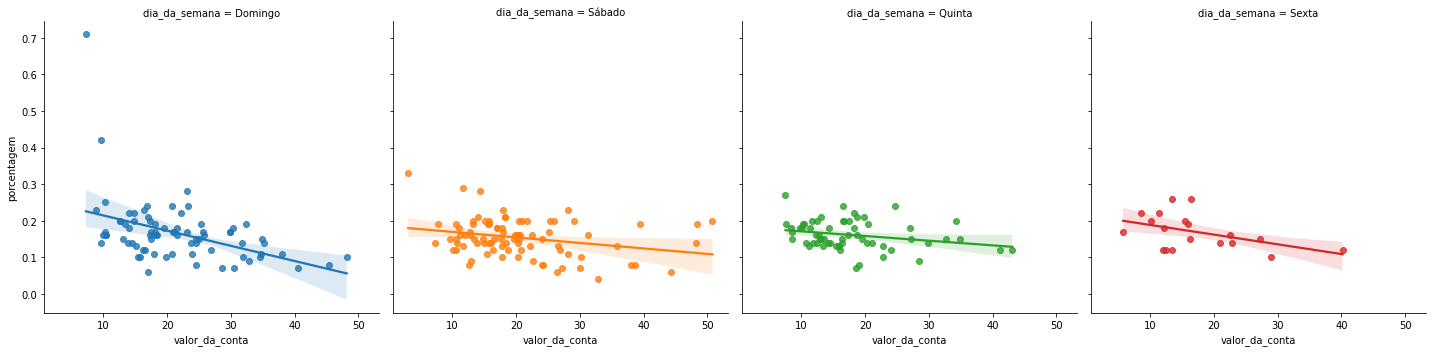

In [50]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [51]:
media_geral_gorjeta = gorjetas.gorjeta.mean()

In [52]:
print(f'A média geral das gorjetas é de {media_geral_gorjeta}')

A média geral das gorjetas é de 2.99827868852459


In [54]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [56]:
print('Frenquencia dos dias')
gorjetas.dia_da_semana.value_counts()

Frenquencia dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

# Teste de hipótese

**H<sup>0</sup>** - A distribuição do valor da conta é igual no sábado e no domingo

**H<sup>1</sup>** - A distribuição do valor da conta não é igual no sábado e no domingo

In [59]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [60]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [64]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

In [65]:
print(f'O valor do p_valor é de {r2.pvalue}')

O valor do p_valor é de 0.3576728477868443


**H<sup>0</sup>** - A distribuição do valor da conta é igual no sábado e no domingo

# Análise 4 - Hora do dia

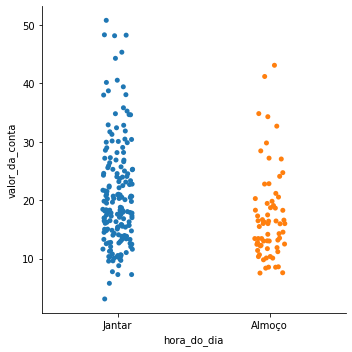

In [66]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

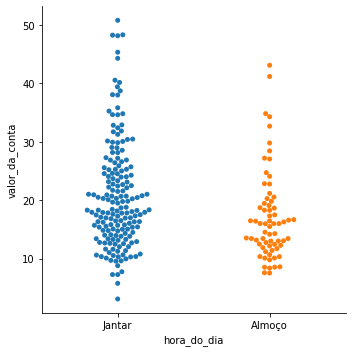

In [67]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

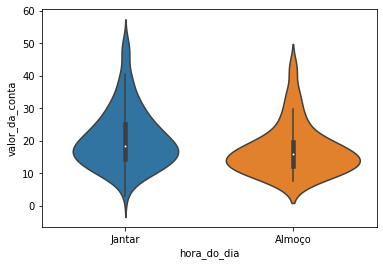

In [68]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

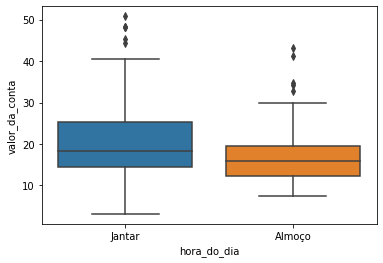

In [69]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [70]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

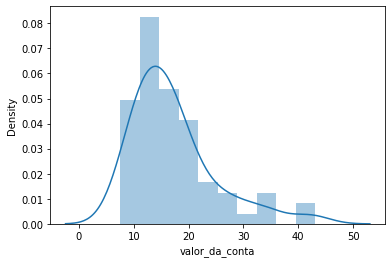

In [72]:
sns.distplot(almoco)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

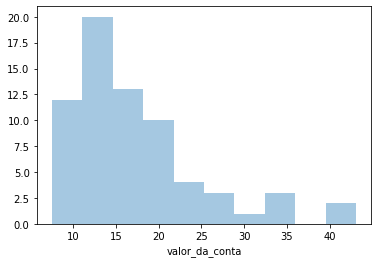

In [73]:
sns.distplot(almoco, kde=False)

In [74]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

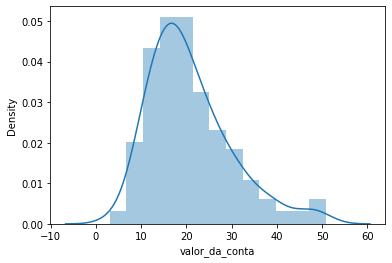

In [76]:
sns.distplot(jantar)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

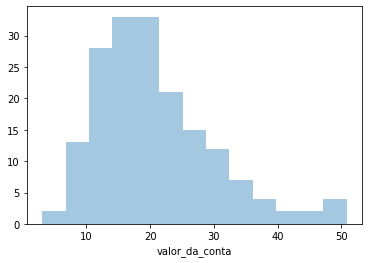

In [77]:
sns.distplot(jantar, kde=False)

In [79]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

**H<sup>0</sup>** - A distribuição do valor da conta é igual no jantar e no almoço

**H<sup>1</sup>** - A distribuição do valor da conta não é igual no jantar e no almoço

In [82]:
r2 = ranksums(jantar, almoco)

In [83]:
print(f'O valor do p-value é de {r2.pvalue}')

O valor do p-value é de 0.0011791039723641672


**H<sup>1</sup>** - A distribuição do valor da conta não é igual no jantar e no almoço

## Teste de hipótese:

**H<sup>0</sup>** - A distribuição da taxa da gorjeta é igual no jantar e no almoço

**H<sup>1</sup>** - A distribuição da taxa da gorjeta não é igual no jantar e no almoço

In [84]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [85]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [87]:
r2 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [88]:
print(f'O valor do p-value é de {r2.pvalue}')

O valor do p-value é de 0.2602493995587126


**H<sup>0</sup>** - A distribuição da taxa da gorjeta é igual no jantar e no almoço